In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from importlib import reload
from utils import *
import test
import acd

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


In [4]:
reload(acd)
acd_ = acd.ACD(w2v)
acd_.train_acd()

Loading tokenizer...
-- ACD:
Loading dataset...
Training...
Evaluating...
F1: 0.7576974564926373


In [5]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
datasets = pd_.load_grid_datasets()

Using TensorFlow backend.


-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
g

Running SVM (baseline, w2v)...
           C  Mean Accuracy
0   0.010000       0.660949
1   0.062105       0.670523
2   0.114211       0.745114
3   0.166316       0.769047
4   0.218421       0.779418
5   0.270526       0.781811
6   0.322632       0.785401
7   0.374737       0.788193
8   0.426842       0.790586
9   0.478947       0.792581
10  0.531053       0.795373
11  0.583158       0.794176
12  0.635263       0.793777
13  0.687368       0.794176
14  0.739474       0.794974
15  0.791579       0.792581
16  0.843684       0.791783
17  0.895789       0.791783
18  0.947895       0.790586
19  1.000000       0.788592
Running SVM (append, w2v)...
           C  Mean Accuracy
0   0.010000       0.651376
1   0.062105       0.737535
2   0.114211       0.760271
3   0.166316       0.777024
4   0.218421       0.785800
5   0.270526       0.791783
6   0.322632       0.796570
7   0.374737       0.798963
8   0.426842       0.802553
9   0.478947       0.805345
10  0.531053       0.805744
11  0.583158    

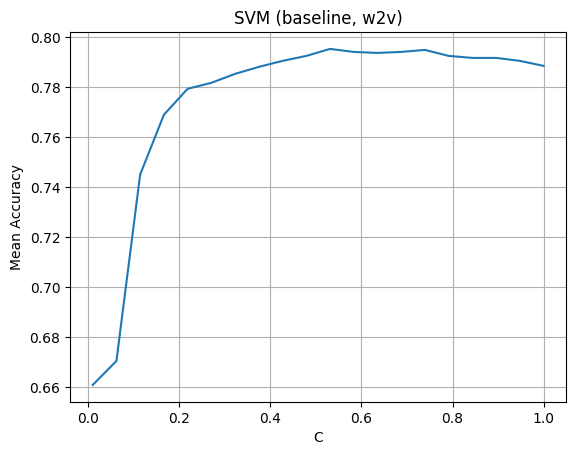

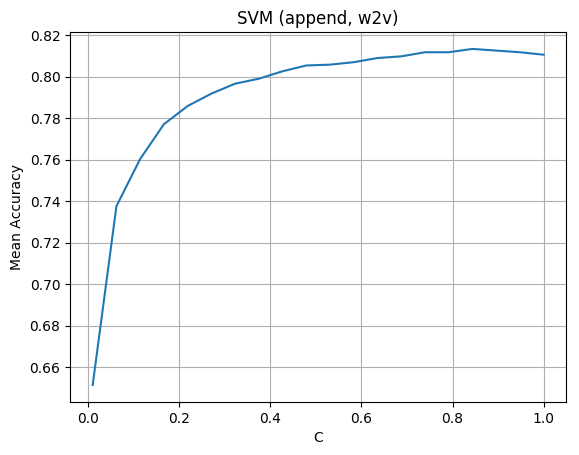

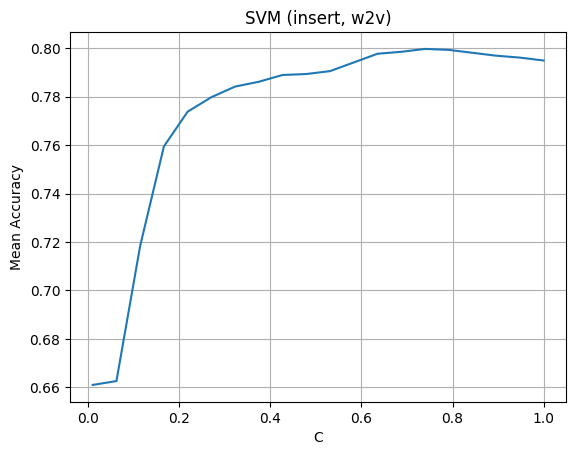

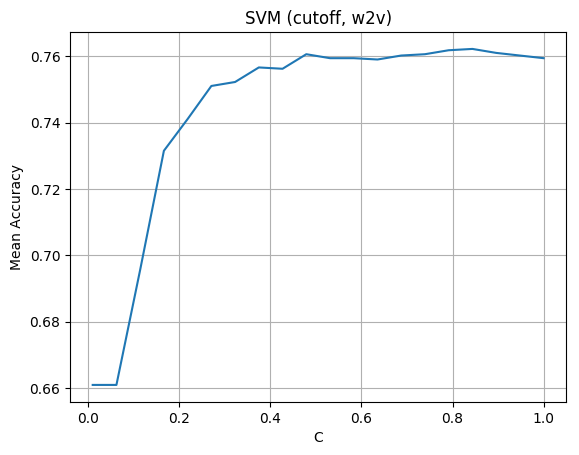

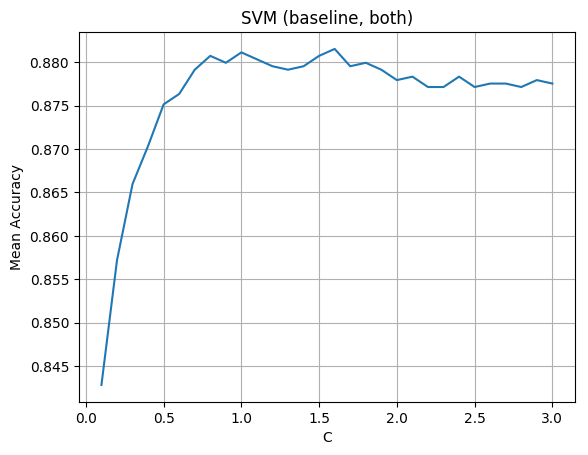

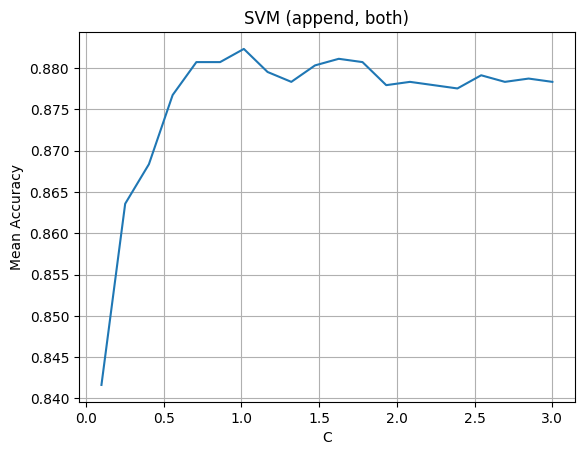

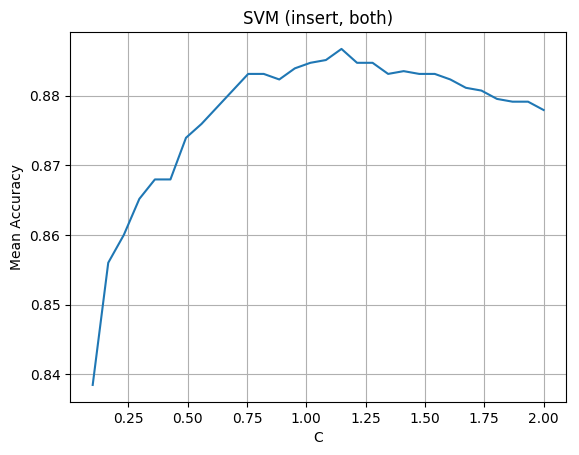

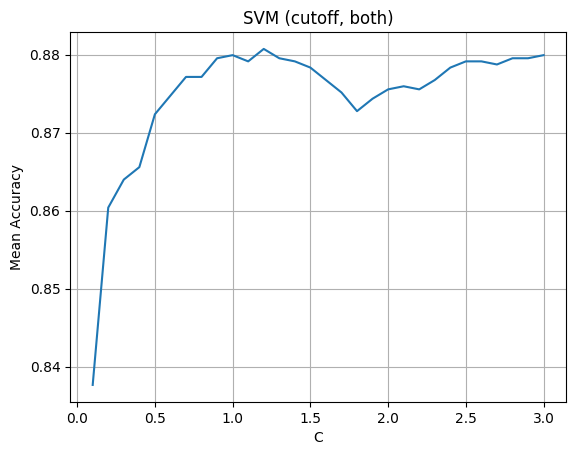

In [6]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.grid_search_pd(datasets)